In [1]:
import json
import matplotlib.pyplot as plt
import math
from typing import List

# Define file paths
multiturn_file_path = './trainer_log_qlora.jsonl'
singleturn_file_path = './trainer_log_qlora.jsonl'

# Function to read data from a JSONL file
def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [json.loads(line) for line in lines]

# Read data from files
multiturn_data = read_jsonl(multiturn_file_path)
singleturn_data = read_jsonl(singleturn_file_path)

In [2]:
def smooth(scalars: List[float]) -> List[float]:
    r"""
    EMA implementation according to TensorBoard.
    """
    if len(scalars) == 0:
        return []

    last = scalars[0]
    smoothed = []
    weight = 1.8 * (1 / (1 + math.exp(-0.05 * len(scalars))) - 0.5)  # a sigmoid function
    for next_val in scalars:
        smoothed_val = last * weight + (1 - weight) * next_val
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

In [3]:
def extract_loss_data(data):
    steps = []
    eval_steps = []
    training_loss = []
    evaluation_loss = []
    for entry in data:
        current_step = entry['current_steps']
        if 'loss' in entry:
            steps.append(current_step)
            training_loss.append(entry['loss'])
        if 'eval_loss' in entry:
            eval_steps.append(current_step)
            evaluation_loss.append(entry['eval_loss'])
    return steps, eval_steps, training_loss, evaluation_loss

In [4]:
multiturn_steps, multiturn_eval_steps, multiturn_training_loss, multiturn_evaluation_loss = extract_loss_data(multiturn_data)

singleturn_steps, singleturn_eval_steps, singleturn_training_loss, singleturn_evaluation_loss = extract_loss_data(singleturn_data)


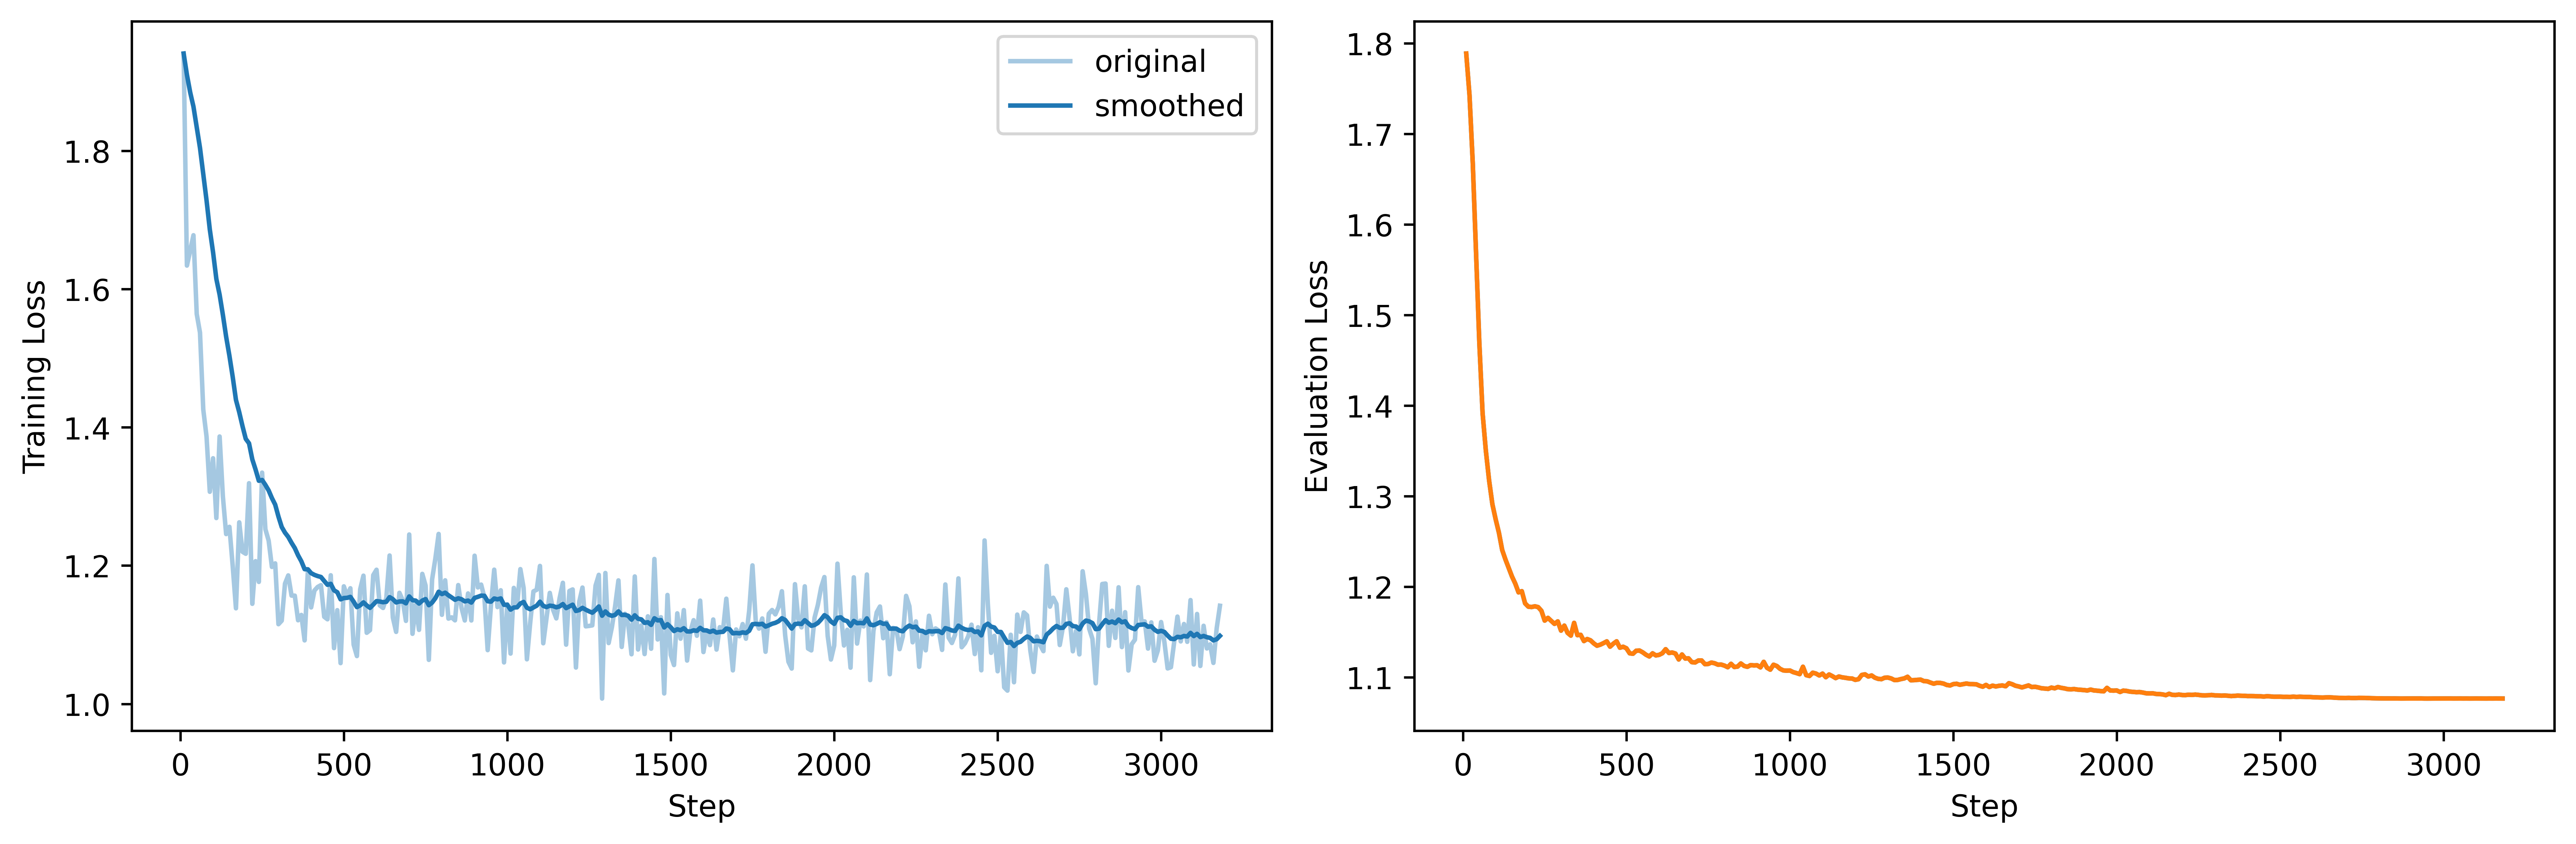

In [5]:
plt.figure(figsize=(12, 4), dpi=600)

# Bilingual Monolingual

# Subplot for training loss
plt.subplot(1, 2, 1)
plt.plot(multiturn_steps, multiturn_training_loss, color="#1f77b4", alpha=0.4, label="original")
plt.plot(singleturn_steps, smooth(singleturn_training_loss), color="#1f77b4", label="smoothed")

# plt.plot(multiturn_steps, multiturn_training_loss, label='Multiturn Training Loss')
# plt.plot(singleturn_steps, singleturn_training_loss, label='Singleturn Training Loss')
plt.xlabel('Step')
plt.ylabel('Training Loss')
# plt.title('Comparison of Training Loss: Multiturn vs Singleturn')
plt.legend()
# plt.grid(True)

# Subplot for evaluation loss
plt.subplot(1, 2, 2)
plt.plot(multiturn_eval_steps, multiturn_evaluation_loss, label='Multiturn Evaluation Loss')
plt.plot(singleturn_eval_steps, singleturn_evaluation_loss, label='Singleturn Evaluation Loss')
plt.xlabel('Step')
plt.ylabel('Evaluation Loss')
# plt.title('Comparison of Evaluation Loss: Multiturn vs Singleturn')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()